# Tiền xử lý dữ liệu văn bản

#### Import thư viện

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import regex as re
import random
import math
import os
from tqdm.notebook import tqdm
import pickle

#### Load dữ liệu

Bộ dữ liệu được tổng hợp từ các tin tức trong nước và ngoài nước với 27 chủ đề khác nhau.
Link dataset: https://github.com/duyvuleo/VNTC

Thông tin bộ dữ liệu
![alt text](image/data_info.png)

In [2]:
# Đường dẫn tới thư mục chứa dữ liệu
test_dir = 'Data/test'
train_dir = 'Data/train'

#### Danh sách nhãn

In [3]:
# Các thư mục có tên là nhãn của các bài báo
labels = os.listdir(train_dir)
print("Số nhãn:", len(labels))
labels

Số nhãn: 27


['Am nhac',
 'Am thuc',
 'Bat dong san',
 'Bong da',
 'Chung khoan',
 'Cum ga',
 'Cuoc song do day',
 'Du hoc',
 'Du lich',
 'Duong vao WTO',
 'Gia dinh',
 'Giai tri tin hoc',
 'Giao duc',
 'Gioi tinh',
 'Hackers va Virus',
 'Hinh su',
 'Khong gian song',
 'Kinh doanh quoc te',
 'Lam dep',
 'Loi song',
 'Mua sam',
 'My thuat',
 'San khau dien anh',
 'San pham tin hoc moi',
 'Tennis',
 'The gioi tre',
 'Thoi trang']

#### Load dữ liệu từ tập train

In [4]:
# Liệt kê tất cả đường dẫn tới các tập dữ liệu train
train_paths = []

for label in tqdm(labels):
    dir_path = train_dir + "/" + label
    news_paths = os.listdir(dir_path)
    for path in news_paths:
        train_paths.append(dir_path + "/" + path)

print("Đã xong")

  0%|          | 0/27 [00:00<?, ?it/s]

Đã xong


In [6]:
# Mở 1 file
with open(train_paths[1], 'r', encoding='utf-16') as f:
    contents = f.read()
    print(contents)

Giống như Keiko Matsui, Blackmore's Night được hầu hết báo chí ở Việt Nam nhắc đến cách đây vài năm với scandal đạo nhạc Renaissance faire - Tuổi 16. Nhưng đối với người yêu nhạc chịu khó chút xíu, không cần đến scandal đó mới biết cái tên Blackmore's Night. Danh tiếng của Richie Blackmore từ khi chơi trong Deep Purple lẫn Rainbow đủ để người ta phải dừng bước trước kệ có đặt đĩa của Blackmore's Night.
Cái tên Blackmore's Night khéo léo kết hợp 2 thành viên chủ chốt của nhóm: tay guitar cự phách Richie Blackmore và cô người yêu Candice Night. Âm nhạc của nhóm từng được chính Richie mô tả là "Mike Oldfield gặp gỡ với Enya". Đến nay, Blackmore's Night đã có 5 album studio chính thức và người nghe cũng xác định được nhóm khác xa với Deep Purple hay Rainbow. Deep Purple góp phần định hình nên nhạc rock của thập niên 70, nền tảng vững chắc cho metal sau này thì Blackmore's Night lại quay lại thời Phục hưng, với những nhạc cụ thời Trung cổ, với đoàn hát rong... Ngày 4/4/2006, Village lantern

In [ ]:
# Đọc tất cả file và label tương ứng
train_x = []
train_y = []

for path in tqdm(train_paths):
    with open(path, 'r', encoding='utf-16') as f:
        content = f.read()
        label = path.split("/")[-2]
        train_x.append(content)
        train_y.append(label)

In [8]:
print('Train size:', len(train_x))

Train size: 14375


In [9]:
train_x[1]

'Giống như Keiko Matsui, Blackmore\'s Night được hầu hết báo chí ở Việt Nam nhắc đến cách đây vài năm với scandal đạo nhạc Renaissance faire - Tuổi 16. Nhưng đối với người yêu nhạc chịu khó chút xíu, không cần đến scandal đó mới biết cái tên Blackmore\'s Night. Danh tiếng của Richie Blackmore từ khi chơi trong Deep Purple lẫn Rainbow đủ để người ta phải dừng bước trước kệ có đặt đĩa của Blackmore\'s Night.\nCái tên Blackmore\'s Night khéo léo kết hợp 2 thành viên chủ chốt của nhóm: tay guitar cự phách Richie Blackmore và cô người yêu Candice Night. Âm nhạc của nhóm từng được chính Richie mô tả là "Mike Oldfield gặp gỡ với Enya". Đến nay, Blackmore\'s Night đã có 5 album studio chính thức và người nghe cũng xác định được nhóm khác xa với Deep Purple hay Rainbow. Deep Purple góp phần định hình nên nhạc rock của thập niên 70, nền tảng vững chắc cho metal sau này thì Blackmore\'s Night lại quay lại thời Phục hưng, với những nhạc cụ thời Trung cổ, với đoàn hát rong... Ngày 4/4/2006, Village

#### Load dữ liệu test từ file

In [10]:
# Liệt kê tất cả đường dẫn tới các tập dữ liệu test
test_paths = []

for label in tqdm(labels):
    dir_path = test_dir + "/" + label
    news_paths = os.listdir(dir_path)
    for path in news_paths:
        test_paths.append(dir_path + "/" + path)

print("Đã xong")

  0%|          | 0/27 [00:00<?, ?it/s]

Đã xong


In [11]:
# Đọc tất cả file và label tương ứng
test_x = []
test_y = []

for path in tqdm(test_paths):
    with open(path, 'r', encoding='utf-16') as f:
        content = f.read()
        label = path.split("/")[-2]
        test_x.append(content)
        test_y.append(label)

  0%|          | 0/12076 [00:00<?, ?it/s]

In [12]:
print('Test size:', len(test_x))

Test size: 12076


In [13]:
test_x[0]

' Cách “diện” của Phương Anh Cuộc thi Sao mai điểm hẹn như một bệ phóng đưa Phương Anh lên bầu trời sao. Và ngôi sao nhỏ Phương Anh đã bắt đầu lấp lánh ánh sáng riêng của mình.\nChọn trang phục theo bài hát \nPhương Anh giữa đời thường \nPhương Anh vẫn đang tìm một nhà thiết kế có phong cách phù hợp để “chiếm làm của riêng”. Nhà thiết kế đó sẽ tư vấn trang phục lên sân khấu cho cô và sẽ tạo những mẫu trang phục riêng biệt chỉ dành riêng cho Phương Anh. \nÝ muốn là thế nhưng khi nghe những đàn chị như Mỹ Tâm hay Hồ Quỳnh Hương từng đặt thiết kế riêng cho những bộ trang phục biểu diễn lên tới hơn chục triệu đồng thì cô vẫn... xanh mắt! “Hiện tại tôi chưa đủ sức đầu tư lớn như thế được”. Phương Anh nói. \nDù vậy, trước mỗi lần biểu diễn, Phương Anh dành khá nhiều thời gian cho việc chuẩn bị trang phục, bởi: “Khán giả đâu có nhắm mắt mà thưởng thức giọng hát của mình. Khi mình xuất hiện trên sân khấu, họ nhìn thấy mình trước khi nghe hát. Và hình ảnh của mình ít nhiều ảnh hưởng đến tai ngh

#### Lưu dữ liệu

In [14]:
train_x_path = 'Data/train_x_raw.sav'
train_y_path = 'Data/train_y_raw.sav'
test_x_path = 'Data/test_x_raw.sav'
test_y_path = 'Data/test_y_raw.sav'

pickle.dump(train_x, open(train_x_path, 'wb'))
pickle.dump(train_y, open(train_y_path, 'wb'))
pickle.dump(test_x, open(test_x_path, 'wb'))
pickle.dump(test_y, open(test_y_path, 'wb'))

#### Load dữ liệu

In [3]:
train_x = pickle.load(open('Data/train_x_raw.sav', 'rb'))
train_y = pickle.load(open('Data/train_y_raw.sav', 'rb'))
test_x = pickle.load(open('Data/test_x_raw.sav', 'rb'))
test_y = pickle.load(open('Data/test_y_raw.sav', 'rb'))

In [16]:
# Test dữ liệu đã load được
random_list = random.sample(range(0, len(train_x) - 1), 5);
for i in random_list:
    print("Cate: ", train_y[i])
    print("Content: ", train_x[i])
    print('-------------------------------')

Cate:  San khau dien anh
Content:  Lớp học cho trẻ khuyết tật mang tên NSND Bảy Nam
Nhân một năm ngày mất của cây đại thụ làng cải lương và kịch nói miền Nam, Sở Văn hóa Thông tin, Nhà hát Kịch TP HCM cùng nghệ sĩ NSƯT Kim Cương tổ chức đêm diễn "Tưởng niệm NSND Bảy Nam" vào ngày 15/8. Ban tổ chức sẽ trích 400 triệu đồng để mở lớp học vi tính mang tên bà dành cho trẻ em tàn tật. 
Những trích đoạn nổi tiếng của NSND Bảy Nam như Nhân danh công lý, Lá sầu riêng..., sẽ được NSƯT Kim Cương cùng với các nghệ sĩ tên tuổi tái hiện lại. Chương trình còn có sự tham gia của nhạc sĩ Nguyễn Ánh 9 với những sáng tác đặc biệt dành cho cố nghệ sĩ. Ca sĩ Ánh Tuyết và Đàm Vĩnh Hưng sẽ trình bày hai ca khúc Bông hồng cài áo, Đường xa vạn dặm. Đặc biệt, Giáo sư Trần Văn Khê cũng có mặt tại đêm diễn với tham luận "Vai trò của NSND Bảy Nam và những người làm nền cho sân khấu".
Theo NSƯT Kim Cương, đây không phải là một chương trình biểu diễn mà chỉ là một suất diễn tưởng niệm NSND Bảy Nam, như một lời tri â

### Đánh giá sơ bộ tập dữ liệu

In [4]:
# Tính độ dài trung bình của tập dữ liệu
def sentence_len(text):
    return len(text.split(" "))

len_list = []

for content in train_x:
    len_list.append(sentence_len(content))

print('Độ dài trung bình:', np.mean(len_list))

Độ dài trung bình: 518.9140869565217


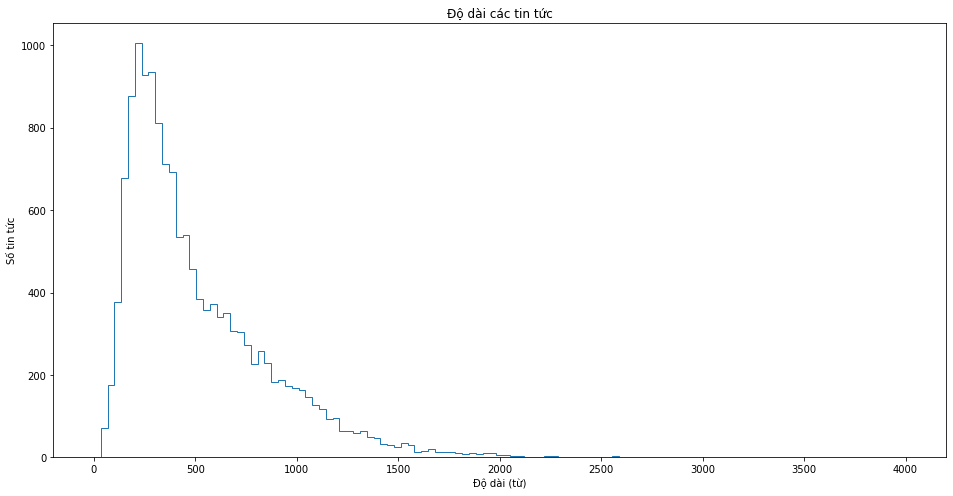

In [6]:
# Vẽ biểu đồ để quan sát phân bố độ dài của từng văn bản
plt.figure(figsize=(16,8))
plt.title("Độ dài các tin tức")
plt.xlabel("Độ dài (từ)")
plt.ylabel("Số tin tức")
plt.hist(np.array(len_list), bins=int(math.sqrt(len(len_list))), histtype='step', range=(0, 4000))
plt.savefig('image/dataset_before_preprocess.png', facecolor='whitesmoke', bbox_inches='tight')
plt.show()

## Tiền xử lý gồm những việc sau:
- Xoá HTML code
- Chuẩn hóa bảng mã Unicode
- Chuẩn hóa kiểu gõ dấu tiếng Việt (dùng òa úy thay cho oà uý)
- Đưa văn bản về dạng viết thường
- Thực hiện tách từ tiếng Việt
- Xóa các ký tự đặc biệt
- Loại bỏ stopwords

#### 1. Xoá HTML code
Dữ liệu thu thập từ các trang web có thể có những đoạn mã HTML. Những đoạn mã này không được sử dụng và làm kém chất lượng của dữ liệu.
Để xoá những đoạn mã HTML, ta dùng regex (Regular Expression) trong Python.

In [19]:
import re
# hàm xoá html code
def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

#ví dụ
txt = "<p class=\"par\">Đây là 1 ví dụ xoá html code</p>"
remove_html(txt)

'Đây là 1 ví dụ xoá html code'

#### 2. Chuẩn hoá bảng mã Unicode
Hiện nay, có 2 loại mã Unicode được sử dụng phổ biến, **Unicode tổ hợp** và **Unicode dựng sẵn**. Việc sử dụng 2 loại mã khác nhau sẽ dẫn đến kết quả khác nhau.
Ví dụ

In [19]:
'hiếu' == 'hiếu'

True

In [20]:
'hiếu' == 'hiếu'

False

Để giải quyết vấn đề này, ta đưa tất cả dữ liệu về loại mã **Unicode dựng sẵn** vì nó khá phổ biến

In [20]:
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

# Hàm tạo dict để chuyển định dạng
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

dicchar = loaddicchar()
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)
 

In [22]:
#Thử nghiệm
type1 = 'hiếu' # Loại dựng sẵn
type2 = 'hiếu' # Loại tổ hợp

print(type1 == type2)
# Nếu là loại dựng sẵn thì không thay đổi
print(type1 == convert_unicode(type1))
# Nếu là loại tổ hợp thì sẽ đưa về loại dựng sẵn
print(type1 == convert_unicode(type2))

False
True
True


#### 3. Chuẩn hoá kiểu gõ dấu và đưa về dạng viết thường
  Bằng mắt thường, ta cũng có thể phân biệt được hai kiểu gõ dấu: **oà** và **òa**, lần lượt là kiểu gõ mới và cũ (phổ biến hơn). Lỗi gõ dấu thường xảy ra là do cách đánh máy của người viết báo, do khác bộ mã hoặc đôi khi nó thường xuất hiện trong các văn bản cũ. Tuy nhiên việc khác bộ mã đã được xử lý ở trên, do đó, ở phần này, ta sẽ sửa những kiểu gõ dấu tiếng Việt khác nhau về kiểu cũ (phổ biến hơn): **òa**

Việc đưa các từ trong câu về chữ viết thường là rất cần thiết. Bởi vì đặc trưng này không có tác dụng ở bài toán phân loại văn bản. Đưa về chữ viết thường giúp giảm số lượng đặc trưng phải học (vì máy hiểu chữ hoa chữ thường là 2 chữ khác nhau) và tăng độ chính xác hơn cho mô hình.

In [1]:
# Danh sách nguyên âm và các dấu
bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
# Danh sách dấu tương ứng với danh sách nguyên âm bên trên
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

# Chuyển ký tự sang chỉ số (i, j), trong đó i là nguyên âm và j là dấu tương ứng
nguyen_am_to_ids = {}

# Tạo dict
for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)
nguyen_am_to_ids['à']

# Kiểm tra tính hợp lệ của từ trong tiếng Việt
# Các nguyên âm sẽ đứng cạnh nhau tạo thành cụm, và mỗi từ tối đa 1 cụm nguyên âm
# Nguyên->Ng(uyê)n, Chào->Ch(ào), Ngủ->Ng(ủ)
def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    
    # Duyệt từng ký tự trong một từ
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1)) # x xác định nguyên âm, y xác định dấu
        if x != -1: # Nếu char là nguyên âm
            if nguyen_am_index == -1: # Nếu chưa tìm thấy nguyên âm
                nguyen_am_index = index
            else: # Nếu đã tìm thấy nguyên âm
                if index - nguyen_am_index != 1: # Nếu nguyên âm không đứng cạnh nguyên âm đã tìm thấy
                    return False
                nguyen_am_index = index
    return True

print(is_valid_vietnam_word('Hello'))
print(is_valid_vietnam_word('Nguyên'))

False
True


In [10]:
def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word): # Không phải từ tiếng việt sẽ không xử lý và trả lại.
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    
    for index, char in enumerate(chars): # Duyệt từng ký tự
        x, y = nguyen_am_to_ids.get(char, (-1, -1))

        if x == -1: # Nếu ký tự là phụ âm
            continue
        elif x == 9:  # check "qu"
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check "gi"
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        
        if y != 0: # Nếu có dấu
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0] # Bỏ dấu
        
        # Nếu không phải trường hợp 'qu' hoặc 'gi' hoặc là index khác 1 (nguyên âm từ ký tự thứ 3 trở đi)
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
        else:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    return ''.join(chars)

# Chuẩn hoá dấu câu cho cả câu và đưa về dạng viết thường
def chuan_hoa_dau_cau_tieng_viet(sentence):
    sentence = sentence.lower() # Chuyển về dạng viết thường
    words = sentence.split()
    
    # Xử lý trên từng từ
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)

print(chuan_hoa_dau_cau_tieng_viet("Hai đội đã hoà nhau. Trận đấu rất hay! Quá tuyệt vời!"))

hai đội đã hòa nhau. trận đấu rất hay! quá tuyệt vời!


#### 4. Tách từ tiếng việt

Đơn vị từ trong tiếng việt gồm từ đơn (học) và từ ghép (học sinh). Ta phải xử lý để mô hình học máy cần phân biệt được từ đơn và từ ghép. Nếu không, đối với máy tất cả đều là từ đơn.

Mô hình học sẽ coi các từ là đặc trưng, phân tách bởi dấu cách. Ta cần phải nối các từ ghép lại

Ví dụ: Học sinh học sinh học -> Học_sinh học sinh_học

Bài toán này là một bài toán cơ sở trong NLP. Hiện nay có khá nhiều thư viện mã nguồn mở giải quyết bài toán này như **underthesea** và **pyvi**. Trong bài này, ta sẽ sử dụng thư viện **underthesea**

In [23]:
# Import thư viện underthesea
from underthesea import word_tokenize

# Ví dụ
sentence = "Chàng trai 2000 Hải Dương khởi nghiệp từ nghề ve chai, sau 10 năm, anh ấy thành vua ve chai"
print(word_tokenize(sentence))
print(word_tokenize(sentence, format="text"))

['Chàng', 'trai', '2000', 'Hải Dương', 'khởi nghiệp', 'từ', 'nghề', 've chai', ',', 'sau', '10', 'năm', ',', 'anh', 'ấy', 'thành', 'vua', 've chai']
Chàng trai 2000 Hải_Dương khởi_nghiệp từ nghề ve_chai , sau 10 năm , anh ấy thành vua ve_chai


#### 5. Xoá các ký tự không cần thiết

Việc loại bỏ các ký tự không cần thiết giúp:
- Giảm số chiều đặc trưng, tăng tốc độc học và xử lý
- Tránh gây nhiễu, ảnh hưởng xấu tới kết quả mô hình

Loại các dấu ngắt câu, các ký tự đặc biệt

In [24]:
def remove_unnecessary_character(document):
    # Xoá các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # Xoá khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

In [27]:
sentence = "Xin chào! Tôi tên là Nguyễn Văn A. Ngày hôm nay của bạn thế nào?"
remove_unnecessary_character(sentence)

'Xin chào Tôi tên là Nguyễn Văn A Ngày hôm nay của bạn thế nào'

#### 6. Tổng hợp các bước trên

In [25]:
def text_preprocessing(document):
    # Xoá html code
    document = remove_html(document)
    # Chuẩn hóa unicode
    document = convert_unicode(document)
    # Chuẩn hóa cách gõ dấu tiếng Việt và đưa về dạng viết thường
    document = chuan_hoa_dau_cau_tieng_viet(document)
    # Tách từ
    document = word_tokenize(document, format="text")
    # Xóa các ký tự không cần thiết và khoảng trắng thừa
    document = remove_unnecessary_character(document)
    return document

In [30]:
# Kiểm tra
document = """
TP HCM phạt người không đeo khẩu trang nơi công cộng
Người dân ở thành phố không đeo khẩu trang nơi công cộng sẽ bị xử phạt mức cao nhất 300.000 đồng, từ ngày 5/8.

Yêu cầu này được Chủ tịch UBND thành phố Nguyễn Thành Phong đưa ra tại cuộc họp Ban chỉ đạo phòng chống dịch bệnh Covid-19 của TP HCM chiều 3/8.

Việc xử phạt không đeo khẩu trang nơi công cộng được TP HCM cũng như các địa phương khác thực hiện từ cuối tháng 3 khi Covid-19 bùng phát. Tuy nhiên, sau khi hết thực hiện cách ly xã hội từ ngày 23/4, việc đeo khẩu trang nơi công cộng chỉ dừng lại ở mức khuyến cáo.

Theo Nghị định số 176/2013, người dân không đeo khẩu trang nơi công cộng sẽ bị xử phạt từ 100.000 đến 300.000 đồng. Trong khoảng một tháng áp dụng trước đó, TP HCM đã xử phạt hơn 4.300 trường hợp với gần 870 triệu đồng.

Theo ông Phong, việc đeo khẩu trang đã được khẳng định có thể tránh lây lan dịch bệnh cho người khác và bảo vệ sức khỏe cho người sử dụng. "Sở Công thương phải nắm nguồn cung ứng khẩu trang, chủ động thông báo các điểm bán để người dân dễ dàng mua vì đã xử phạt thì phải bảo đảm đủ nguồn cung", ông Phong nói.

Đội trật tự đô thị phường Bến Nghé, quận 1, xử phạt người không đeo khẩu trang trên phố đi bộ Nguyễn Huệ, chiều 15/4. Ảnh: Quỳnh Trần.
Đội trật tự đô thị phường Bến Nghé, quận 1, xử phạt người không đeo khẩu trang trên phố đi bộ Nguyễn Huệ, chiều 15/4. Ảnh: Quỳnh Trần.

Bí thư Thành uỷ Nguyễn Thiện Nhân cũng cho rằng việc đeo khẩu trang là một trong những biện pháp cơ bản để tránh dịch bệnh lây lan. Việc này rất dễ làm, không tốn nhiều tiền nhưng nhiều nước bỏ lơi và đã bị "vỡ trận".

"Ngoài đường hiện có ít nhất 20% người không đeo khẩu trang. Người không đeo không những tự rước bệnh vào mình mà còn nguy cơ lây cho người khác. Đeo khẩu trang hơi cực tí thôi nhưng đi đâu cũng nên đeo để giữ an toàn", ông Nhân nói và khẳng định thành phố bảo đảm không thiếu khẩu trang cho người dân.

Chủ tịch UBND thành phố Nguyễn Thành Phong cũng cho biết đã đồng ý việc tái lập các chốt kiểm soát ở cửa ngõ TP HCM để phòng chống Covid-19.

Trước đó, thành phố đã lập 62 chốt kiểm soát, hoạt động 24/24 từ ngày 4/4 để phòng chống dịch. Lực lượng tham gia là Công an thành phố, Sở Y tế, Bộ Tư lệnh thành phố, Thanh tra giao thông, Ban Quản lý An toàn thực phẩm, quản lý thị trường.

Trong đó, 16 chốt chính (cấp thành phố) đặt tại: Trạm thu phí Long Phước (cao tốc TP HCM - Long Thành - Dầu Giây), cao tốc Trung Lương, cầu Đôi (đường Trần Văn Giàu), đường Ba Làng, đường Xuyên Á (quốc lộ 22), cầu Phú Cường, cầu Vĩnh Bình, cầu vượt Sóng Thần, quốc lộ 1K, quốc lộ 50, quốc lộ 1A, cầu Đồng Nai, Bến xe Miền Tây, Bến xe miền Đông, sân bay Tân Sơn Nhất, cảng Cát Lái.

Đến ngày 23/4, chính quyền thành phố dừng hoạt động các chốt này vì dịch bệnh đã được khống chế, TP HCM dừng cách ly xã hội theo Chỉ thị 19 của Thủ tướng.

Sau 19 ngày hoạt động, các chốt chính đã kiểm tra gần 270.000 xe, trong đó có 235.000 ôtô; gần 600.000 người được kiểm tra y tế, đo thân nhiệt, bao gồm cả 3.000 người nước ngoài; hơn 130.000 người được yêu cầu khai báo y tế.
"""
document = text_preprocessing(document)
print(document)

tp hcm phạt người không đeo khẩu_trang nơi công_cộng người dân ở thành_phố không đeo khẩu_trang nơi công_cộng sẽ bị xử_phạt mức cao nhất 300 000 đồng từ ngày 58 yêu_cầu này được chủ_tịch ubnd thành_phố nguyễn_thành phong đưa ra tại cuộc họp ban chỉ_đạo phòng_chống dịch_bệnh covid 19 của tp hcm chiều 38 việc xử_phạt không đeo khẩu_trang nơi công_cộng được tp hcm cũng như các địa_phương khác thực_hiện từ cuối tháng 3 khi covid 19 bùng_phát tuy_nhiên sau khi hết thực_hiện cách_ly xã_hội từ ngày 234 việc đeo khẩu_trang nơi công_cộng chỉ dừng lại ở mức khuyến_cáo theo nghị_định số 1762013 người_dân không đeo khẩu_trang nơi công_cộng sẽ bị xử_phạt từ 100 000 đến 300 000 đồng trong khoảng một tháng áp_dụng trước đó tp hcm đã xử_phạt hơn 4 300 trường_hợp với gần 870 triệu đồng theo ông phong việc đeo khẩu_trang đã được khẳng_định có_thể tránh lây_lan dịch_bệnh cho người khác và bảo_vệ sức_khỏe cho người sử_dụng sở công_thương phải nắm nguồn cung_ứng_khẩu_trang chủ_động thông_báo các điểm bán đ

In [26]:
# Thực hiện xử lý trên toàn bộ dữ liệu
print('Xử lý dữ liệu trên tập train...')
for i, news in enumerate(tqdm(train_x)):
  train_x[i] = text_preprocessing(news)

print('Xử lý dữ liệu trên tập test...')
for i, news in enumerate(tqdm(test_x)):
  test_x[i] = text_preprocessing(news)

Xử lý dữ liệu trên tập train...


  0%|          | 0/14375 [00:00<?, ?it/s]

Xử lý dữ liệu trên tập test...


  0%|          | 0/12076 [00:00<?, ?it/s]

In [32]:
# Kiểm tra
train_x[1]

'giống như keiko matsui blackmore s night được hầu_hết báo_chí ở việt nam nhắc đến cách đây vài năm với scandal đạo nhạc renaissance faire tuổi 16 nhưng đối_với người_yêu nhạc chịu_khó chút_xíu không cần đến scandal đó mới biết cái tên blackmore s night danh_tiếng của richie blackmore từ khi chơi trong deep purple lẫn rainbow đủ để người_ta phải dừng bước trước kệ có đặt đĩa của blackmore s night cái tên blackmore s night khéo_léo kết_hợp 2 thành_viên chủ_chốt của nhóm tay guitar cự_phách richie blackmore và cô người_yêu candice night âm_nhạc của nhóm từng được chính richie mô_tả là mike oldfield gặp_gỡ với enya đến nay blackmore s night đã có 5 album studio chính_thức và người nghe cũng xác_định được nhóm khác_xa với deep purple hay rainbow deep purple góp_phần định_hình nên nhạc rock của thập_niên 70 nền_tảng vững_chắc cho metal sau_này thì blackmore s night lại quay lại thời phục_hưng với những nhạc_cụ thời trung_cổ với đoàn hát_rong ngày 442006 village lanterne album thứ 6 của blac

#### 7. Loại bỏ stop word tiếng Việt

- Stopword là các từ xuất hiện nhiều ở tất cả các chuyên mục cần phân loại. Do đó, chúng là các đặc trưng không có tác dụng cho việc phân loại văn bản.
- Các stopword thường là các từ nối (của, là, có, được, những,…) và các từ đặc trưng của dữ liệu (ví dụ như các từ “máy bay, tiếp viên” là các stopword nếu làm bài phân loại đánh giá khách hàng của doanh nghiệp vận tải hàng không).

In [33]:
# Thống kê các từ và số lượng tương ứng
count = {}
print('Processing news ...')
for content in (train_x + test_x):
  words = content.split(' ')
  for word in words:
    if word not in count:
      count[word] = 1
    else:
      count[word] += 1

print('Number of words in dataset: ', len(count))

Processing news ...
Number of words in dataset:  104810


In [34]:
# Liệt kê 100 từ xuất hiện nhiều nhất
sorted_count = sorted(count, key=count.get, reverse=True)
for word in np.array(sorted_count)[:100]:
  print(f'{word} - {count[word]}')

của - 168186
và - 165870
là - 124178
có - 119364
các - 109433
trong - 108983
một - 101145
được - 100726
cho - 95665
với - 93702
không - 92446
những - 88805
đã - 84438
người - 75284
khi - 62877
ở - 62754
để - 60376
này - 60125
sẽ - 59242
tôi - 56265
cũng - 53960
vào - 50447
đến - 48522
phải - 45238
nhiều - 45126
đó - 44467
về - 44463
như - 43512
từ - 42773
nhưng - 42522
anh - 40735
năm - 40024
trên - 39840
ra - 39319
tại - 37665
sau - 37503
làm - 36195
lại - 35948
còn - 35051
hơn - 33227
1 - 33218
chỉ - 32764
2 - 32721
bạn - 32283
mình - 30450
rất - 30234
có_thể - 29331
theo - 28061
trước - 28031
thì - 28001
hai - 27365
sự - 26979
3 - 26772
mới - 26479
mà - 25648
bị - 25017
đi - 24847
ngày - 24710
nhất - 24691
đang - 24055
nam - 23746
nhà - 23702
họ - 23302
ông - 23184
biết - 22547
lên - 21869
việc - 21427
trận - 21061
đây - 20917
vẫn - 20454
việt - 19541
đội - 19488
khác - 19257
tới - 18975
nước - 18815
vì - 18679
nên - 18569
qua - 18503
nếu - 18268
cả - 17847
bằng - 17782
4 - 17647
5 

In [35]:
# Thêm 100 từ nhiều nhất vào danh sách stopword
stopwords = set()
for word in sorted_count[:100]:
    stopwords.add(word)

# Lưu danh sách stopwords
stopwords_path = 'Data/saved/stopwords.sav'
pickle.dump(stopwords, open(stopwords_path, 'wb'))

#### Loại bỏ stopword khỏi tập train và test

In [36]:
# Loại bỏ stopword
def remove_stopwords(document):
    words = document.split(' ')
    res = list()
    for word in words:
        if word not in stopwords:
            res.append(word)
    return ' '.join(res)

# Kiểm tra
remove_stopwords(text_preprocessing('Theo nghị định đã ban hành, người dân cần ở trong nhà đến hết ngày 16/9.'))

'nghị_định ban_hành dân cần hết 169'

In [37]:
# Thực hiện trên toàn bộ dữ liệu
print('Loại bỏ stopwords trên tập train...')
for i, news in enumerate(tqdm(train_x)):
  train_x[i] = remove_stopwords(news)

print('Loại bỏ stopwords trên tập test...')
for i, news in enumerate(tqdm(test_x)):
  test_x[i] = remove_stopwords(news)

Loại bỏ stopwords trên tập train...


  0%|          | 0/14375 [00:00<?, ?it/s]

Loại bỏ stopwords trên tập test...


  0%|          | 0/12076 [00:00<?, ?it/s]

In [38]:
# Kiểm tra
for i in random.sample(range(0, len(train_x)), 5):
    print('Cate:', train_y[i])
    print('Content:', train_x[i])

Cate: Chung khoan
Content: ssc tăng_giá phiên giao_dịch đầu_tiên công_ty cổ_phần giống cây_trồng miền sáng nay dấu_hiệu khá lạc_quan giá khớp lệnh đạt 30 800 đồngcổ phiếu tăng 8 so giá khởi_điểm tuy_nhiên khối_lượng giao_dịch khiêm_tốn 27 280 cổ_phiếu nhà_đầu_tư giá khớp lệnh vậy chứng_tỏ ssc khá hấp_dẫn tạo thêm sức_sống thị_trường phiên giao_dịch sáng nay vn index tiếp_tục tăng 0 235 81 tổng giá_trị toàn_thị_trường đạt tỷ đồng ngoài ssc cổ_phiếu vtc tms ts4 sfc tăng_giá thêm 300 đồng mỗi cổ_phiếu btc thu_hút chú_ý nhà_đầu_tư song chiều_hướng ngược_lại mức giảm_giá khá 400 đồng thông_tin gây thất_vọng giới đầu_tư công_ty dự_tính lỗ tỷ đồng 2004 tính 2003 doanh_nghiệp lỗ tỷ đồng
Cate: Bong da
Content: hà lan đối_đầu thử_thách italy chạm_mặt cừu_địch một_nửa tấm vé đức quyết_định hà lan đón_tiếp romania đêm nay vòng loại world cup khu_vực châu_âu italy cảnh thiếu trụ_cột quan_trọng hành_quân phương bắc gặp đối_thủ kỵ giơ nauy tuần giải vô_địch quốc_gia lớn kết_thúc sân_cỏ châu_âu nóng v

#### Lưu lại dữ liệu đã hoàn tất tiền xử lý

In [39]:
train_x_path = 'Data/saved/train_x.sav'
train_y_path = 'Data/saved/train_y.sav'
test_x_path = 'Data/saved/test_x.sav'
test_y_path = 'Data/saved/test_y.sav'

pickle.dump(train_x, open(train_x_path, 'wb'))
pickle.dump(train_y, open(train_y_path, 'wb'))
pickle.dump(test_x, open(test_x_path, 'wb'))
pickle.dump(test_y, open(test_y_path, 'wb'))

**Kết luận:** Như vậy là đã hoàn thành quá trình tiền xử lý dữ liệu. Tiếp theo sẽ là phần phân loại các tin tức đã được xử lý.